In [1]:
import pandas as pd
from rank_algs import *
from metrics import *
import matplotlib.pyplot as plt

In [2]:
inp = pd.DataFrame(columns = ['a', 'score'])
probs = {'red': 0.7, 'blue': 0.3}
df = gen_fake_data('a', probs, {'red': 50, 'blue': 50}, k=100, seed=42)
df.sort_values(by='score', inplace=True, ascending=False)

print(infeasible_index(df, 'a', probs, 10))

(2, {10, 7})


In [3]:
res = detconstsort(items = df, props = probs, kmax = 10, s = 'a')
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
res

Infeasible Index: (1, {7})


,score,a
5,97.562235,red
22,97.069802,red
31,96.750973,red
99,96.189766,blue
11,92.676499,red
23,89.312112,red
2,85.859792,red
72,85.340307,blue
41,83.267820,red
82,81.402038,blue


In [4]:
res = detcons(items = df, props = probs, kmax = 10, s = 'a',relaxed=False)
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
res

Infeasible Index: (1, {10})


,score,a
5,97.562235,red
22,97.069802,red
99,96.189766,blue
31,96.750973,red
11,92.676499,red
72,85.340307,blue
23,89.312112,red
2,85.859792,red
41,83.267820,red


In [5]:
res = detcons(items = df, props = probs, kmax = 10, s = 'a',relaxed=True)
print(f"Infeasible Index: {infeasible_index(res, 'a', probs, 10)}")
res

Infeasible Index: (1, {10})


,score,a
5,97.562235,red
5,97.562235,red
99,96.189766,blue
22,97.069802,red
22,97.069802,red
72,85.340307,blue
31,96.750973,red
31,96.750973,red
31,96.750973,red


In [6]:
ii_dg, ii_dc, ii_dcr, ii_dcs = [] ,[] ,[] , []
ndcg_dg, ndcg_dc, ndcg_dcr, ndcg_dcs = [],[],[],[]

for n_a in range(2, 10):
    inp = pd.DataFrame(columns = ['a', 'score'])
    props = {a: 1/n_a for a in range(1, n_a+1)}
    means = {a: a*10 for a in range(1, n_a+1)}
    df_ = gen_fake_data('a', props, means, k=100, seed=42)
    df_.sort_values(by='score', inplace=True, ascending=False)
    dg = detgreedy(items=df_, s='a', props=props, kmax=10)
    dc = detcons(items=df_, s='a', props=props, kmax=10, relaxed=False)
    dcr = detcons(items=df_, s='a', props=props, kmax=10, relaxed=True)
    dcs = detconstsort(items = df_, props = props, kmax = 10, s = 'a')
    
    ii_dg.append(infeasible_index(dg, 'a', props, 10)[0])
    ndcg_dg.append(ndcg(dg['score']))
    ii_dc.append(infeasible_index(dc, 'a', props, 10)[0])
    ndcg_dc.append(ndcg(dc['score']))
    ii_dcr.append(infeasible_index(dcr, 'a', props, 10)[0])
    ndcg_dcr.append(ndcg(dcr['score']))
    ii_dcs.append(infeasible_index(dcs, 'a', props, 10)[0])
    ndcg_dcs.append(ndcg(dcs['score']))

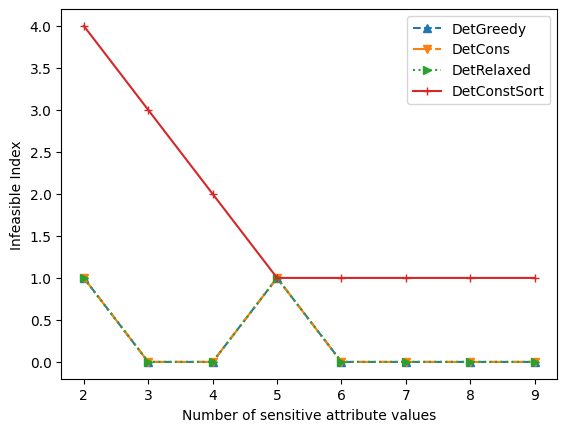

In [7]:
plt.plot(range(2,10), ii_dg, label='DetGreedy', linestyle='--', marker='^')
plt.plot(range(2,10), ii_dc, label='DetCons', linestyle='-.', marker='v')
plt.plot(range(2,10), ii_dcr, label='DetRelaxed', linestyle=':', marker='>')
plt.plot(range(2,10), ii_dcs, label='DetConstSort', linestyle='-', marker='+')
plt.xlabel("Number of sensitive attribute values")
plt.ylabel("Infeasible Index")
plt.legend()

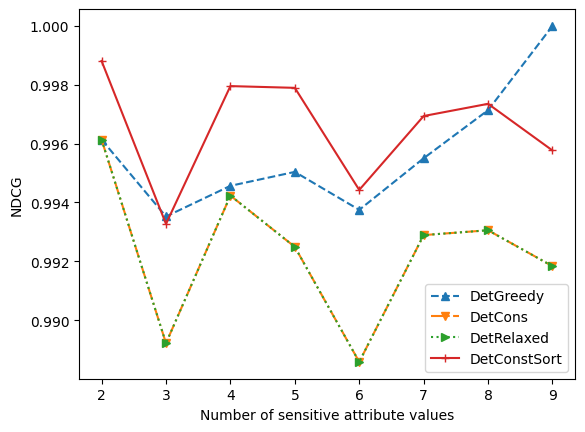

In [8]:
plt.plot(range(2,10), ndcg_dg, label='DetGreedy', linestyle='--', marker='^')
plt.plot(range(2,10), ndcg_dc, label='DetCons', linestyle='-.', marker='v')
plt.plot(range(2,10), ndcg_dcr, label='DetRelaxed', linestyle=':', marker='>')
plt.plot(range(2,10), ndcg_dcs, label='DetConstSort', linestyle='-', marker='+')
plt.xlabel("Number of sensitive attribute values")
plt.ylabel("NDCG")
plt.legend()